# Microwave and Radar Remote Sensing - WS2

Dr. Ing. Francescopaolo Sica

## Coverage, Resolution, Timing and Sampling

In this workshop we will introduce further crucial properties of MRRS system, like coverage and resolution, and comment on system design aspects.  

To start our simulations, we first need to check if we correctly set the environment and test if all necessary packages have been installed. The following line of code will:
1) make a check about the python environment one is currently using

2) import the needed python packages (in case of errors, the package has probably not correctly been installed in the environment)


In [64]:
import sys
print(sys.executable)

/bin/python


In [65]:
import scipy.constants as constants
import matplotlib.pyplot as plt
import numpy as np

### From the theory

The two fundamental elements shaping the coverage of a MSSR system are the **orbit** and the **antenna pattern**. The orbit defines the **velocity of the spacecraft**, whereas the **footprint** results from the combination of antenna pattern and **observation geometry**. 

- The footprint, approximated by a square, can be thought of as having a component in elevation and a component in azimuth. 
- The extension of the footprint in elevation is called **swath**. 
- The angle between the wave vector and normal to the surface is called **incidence**. 
- The angle between the wave vector and the nadir vector of the spacecraft is called **look**. 


The figure below shows the observation geometry for **airborne** systems. 



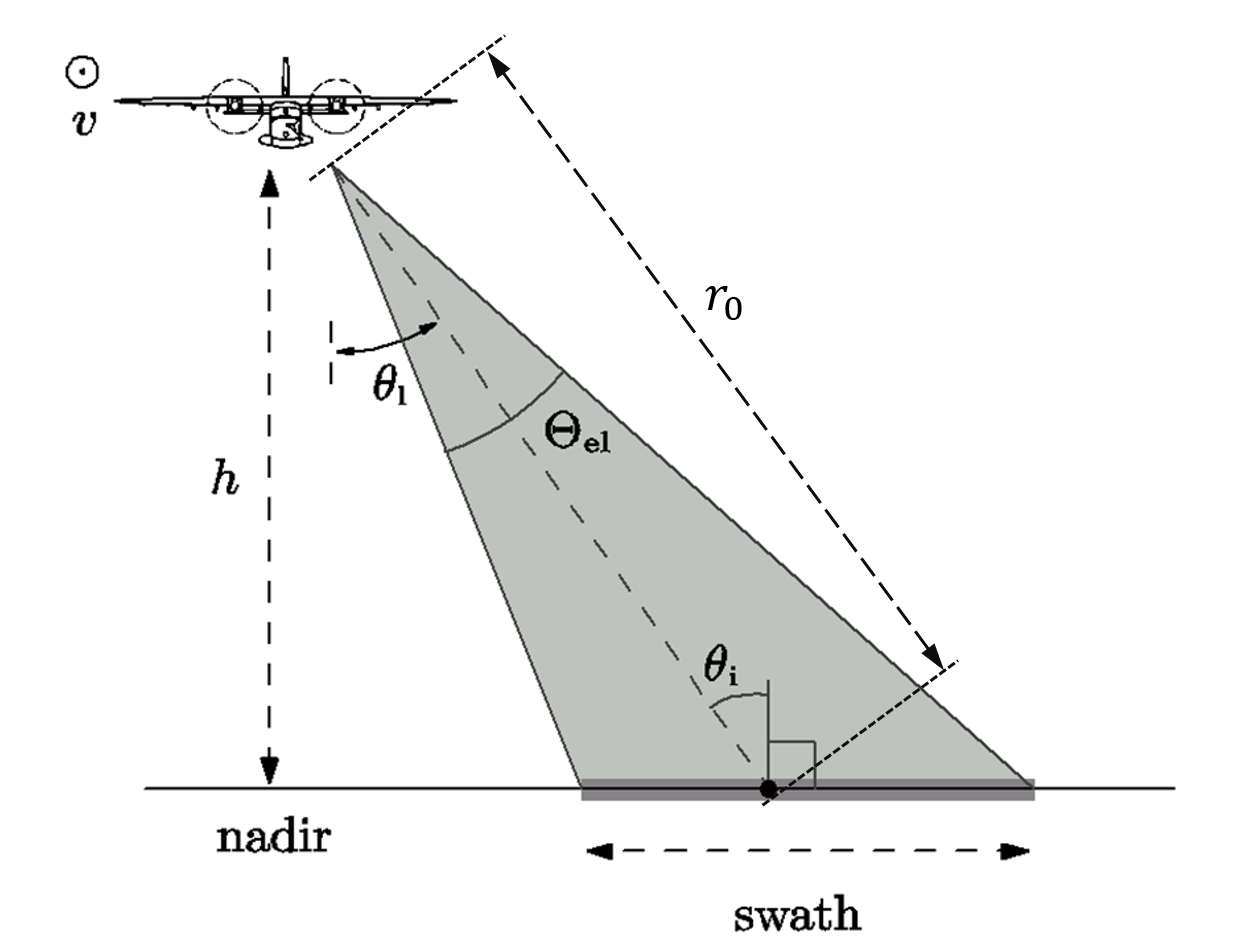



Note for an airborne geometry incident and look angles coincide in the case of a flat scene, and therefore **the maximum and minimum incident angles can be related to the aperture of the antenna in elevation** as follows

$$\theta_\mathrm{el} = \theta_\mathrm{inc, max} - \theta_\mathrm{inc, min}\quad .$$



The swath can be computed precisely as a function of the incident angles as follows

$$S_\mathrm{w} = h\cdot (\tan\theta_\mathrm{inc, max} - \tan\theta_\mathrm{inc, min})\quad ,$$

where $h$ is the height of the airplane. A fair **approximation**, however, typically valid **for small swaths** is

$$S_\mathrm{w} \approx \frac{r_0\cdot \theta_\mathrm{el}}{\sin\theta_\mathrm{inc}}\quad ,$$

in which basic figures of the observation geometry are used, and the geometric term in the denominator is used to project from slant to ground. 

The figure below shows the observation geometry for **spaceborne** systems. 

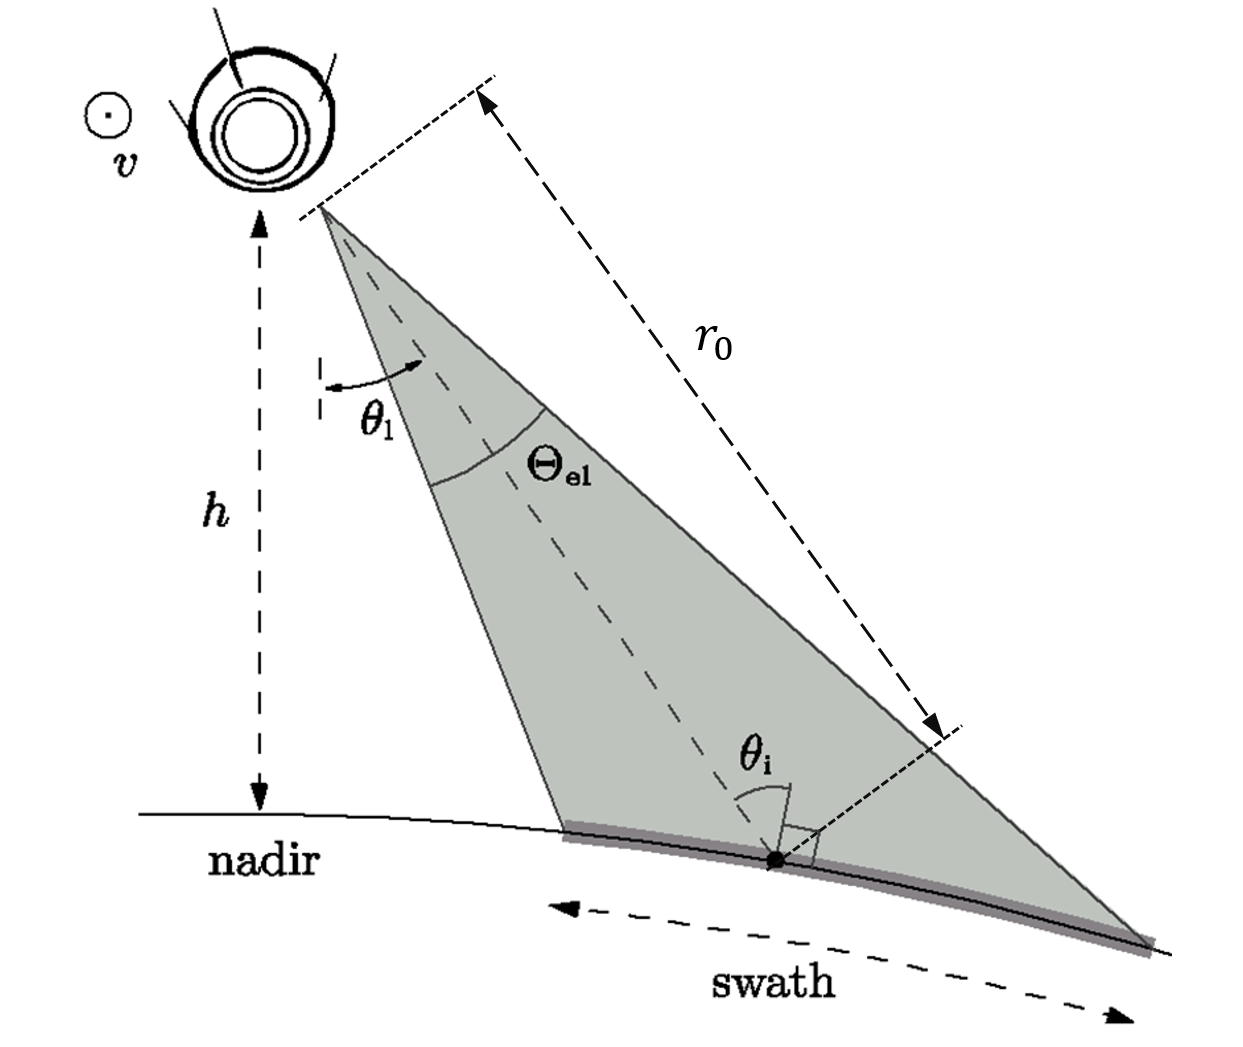




For a spaceborne system, in general, **the incident angle is larger than the look angle** due to the fact that, for this acquisition geometry, the Earth's curvature plays a role. The swath can be still computed by using the precise formula and the minimum and maximum incidence angle values.  

In azimuth, the length of the **azimuth footprint** can be approximated as

$$S_\mathrm{a} \approx r_0\cdot \theta_\mathrm{az}\quad .$$

**Note:** $r_0$ changes along the swath and the previous expressions are only approximations. 

The **coverage rate** can be expressed as the product of the **footprint velocity** and the swath of the system, i.e., 

$$C_\mathrm{r} = S_\mathrm{w}\cdot v_{g}\quad ,$$

and provides the area covered by the system as a function of time.

### Exercise 1 

Assuming a flat scene (i.e., a scene with flat topography), calculate and show the relationship between look and incident angles for an airborne and a spaceborne systems flying at 3 km and 514 km height, respectively.
What can you observe? How is it related to the acquisition geometry

In [66]:
# Define a function that computes the range distance r0 and the incidence angle given the acquisition geometry
# inputs: rE - Earth radius.
# h     -  platform altitude
# look  -  look angle

def compute_r0_thetainc(rE, h, theta_look):
    b    = (rE + h) * 2 * np.cos(theta_look)
    c    = -(rE**2 - (rE + h)**2)
    r0   = (b - np.sqrt(b**2 - 4 * c)) * 0.5
    theta_inc   = np.arccos(((rE + h)**2 - rE**2 - r0**2)/(2 * r0 * rE))
    return r0, theta_inc
    


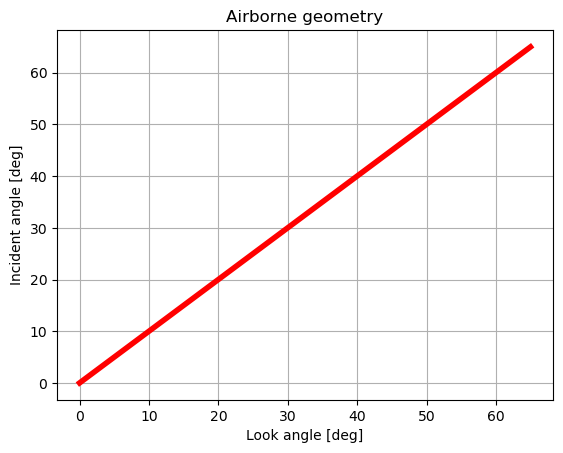

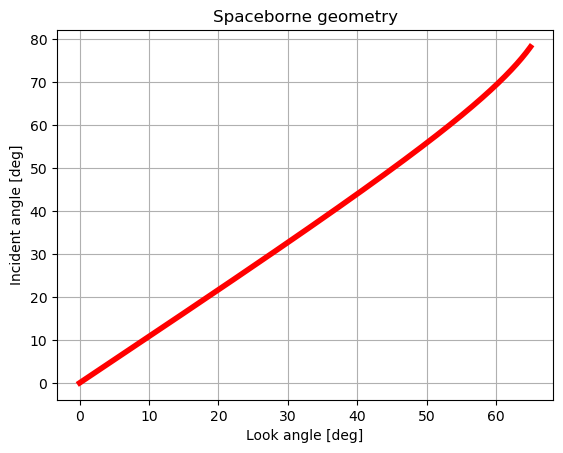

In [67]:
rE   = 6371.e3  # Earth radius
N    = 1024
theta_look = (0. + np.arange(N) / N * 65.) * np.pi / 180.

## compute incidence angle
# airborne system
hAir = 3e3
_,theta_inc_air = compute_r0_thetainc(rE ,hAir,theta_look)

# spaceborne system
hSat = 514.e3
_, theta_inc_spc = compute_r0_thetainc(rE ,hSat ,theta_look)

plt.figure()
plt.title('Airborne geometry')
plt.plot(theta_look * 180. / np.pi, theta_inc_air * 180. / np.pi, 'r', lw = 4)
plt.xlabel('Look angle [deg]')
plt.ylabel('Incident angle [deg]')
plt.grid()

plt.figure()
plt.title('Spaceborne geometry')
plt.plot(theta_look * 180. / np.pi, theta_inc_spc * 180. / np.pi, 'r', lw = 4)
plt.xlabel('Look angle [deg]')
plt.ylabel('Incident angle [deg]')
plt.grid()
plt.show()

### Answer 1

For an airborne geometry the look angle is directly proportional to the the incident angle, that is the higher the look angle the higher the incident angle normal to the surface of the reflecting body. Likewise a space borne geometry but as the incident angle of the waveform increases at higher look angles it ceases to have effect on the waveform incident on the body. 


### Exercise 2

An **airborne** side-looking radar flying at 3000 m illuminates a swath with look angles ranging from 20 deg (near range) to 60 deg (far range). Compute the exact swath and express the percentual error with respect to its approximation. Discuss whether the approximation is acceptable and relate your observations to the plot in excercise 1.


### Answer 2

In [68]:
hAir = 3.e3     
rE   = 6371.e3  # Earth radius
N    = 1024
theta_look = np.arange(20,60,40/N) * np.pi / 180.

## compute range distance and incidence angle
r0_air, theta_inc_air = compute_r0_thetainc(rE,hAir,theta_look)

## compute swath using the precise formula
def swath(theta_inc,hAir ,rE):
    Sw_air=hAir *(np.tan(np.max(theta_inc_air))-np.tan(np.min(theta_inc_air)))
    return Sw_air
swath_air =swath(theta_inc_air,hAir,rE)

# compute swath approximation
theta_el = np.max(theta_inc_air) - np.min(theta_inc_air)
idx = int(r0_air.size/2)
swath_approx = r0_air[idx] * theta_el / np.sin(theta_inc_air[idx])

print('Swath airborne:')
print(swath_air)
print('Swath airborne approximated:')
print(swath_approx)
print('Approximation error in percentage:')
print(abs(swath_air - swath_approx)/swath_air * 100)

Swath airborne:
4105.257160018027
Swath airborne approximated:
4251.87899614548
Approximation error in percentage:
3.5715627648234674


### Answer 2 - comments

**your answer here**


### Exercise 3

Compute the value of the swath of a **spaceborne** side-looking radar flying at 514 km and imaging a swath with the same range of look angles as in excercise 2. Express the error of the approximation and discuss the results. Relate your observations to the plot in excercise 1.

### Answer 3

In [69]:
hSat = 514.e3
rE   = 6371.e3  # Earth radius

N    = 1024
theta_look = np.arange(20, 60, 40/N) * np.pi / 180.

## compute range distance and incidence angle
r0_sat, theta_inc_sat = compute_r0_thetainc(rE,hSat,theta_look)

## compute swath with precise formula
def swath(theta_inc_sat,hsat,rE):
    Sw_sat=hSat*(np.tan(np.max(theta_inc_sat))-np.tan(np.min(theta_inc_sat)))
    return Sw_sat
swath_spc =swath(theta_inc_sat,hSat,rE)

# compute swath approximation
theta_el = np.max(theta_inc_sat) - np.min(theta_inc_sat)
idx = int(r0_sat.size/2)
swath_approx = r0_sat[idx] * theta_el / np.sin(theta_inc_sat[idx])


print('Swath spaceborne:')
print(swath_spc)
print('Swath spaceborne approximated:')
print(swath_approx)
print('Approximation error in percentage:')
print(abs(swath_spc - swath_approx)/swath_spc * 100)





Swath spaceborne:
1156756.921649451
Swath spaceborne approximated:
827062.9762060196
Approximation error in percentage:
28.501575332984547


### Answer 3 - comments

**your answer here**

### Exercise 4

Compute the coverage rate in km^2/s of the previous systems. Assume a footprint velocity of 100 m/s and 7000 m/s for the airborne and the spaceborne, respectively.


In [70]:
vg_air  = 120  # [m/s]
vg_air1 = 100  # [m/s]
vg_spc = 7e3  # [m/s]

## Compute coverage for the two systems 
# airborne system
coverage_air = (swath_air * vg_air)/1e6

## Compute coverage for the two systems 
# airborne system
coverage_air1 = (swath_air * vg_air1)/1e6

# spaceborne system
coverage_spc = (swath_spc*vg_spc)/1e6

print('Coverage for an airborne system [km^2/s]:')
print(coverage_air)

print('Coverage for an airborne system [km^2/s]:')
print(coverage_air1) 

print('Coverage for a spaceborne system [km^2/s]:')
print(coverage_spc)

Coverage for an airborne system [km^2/s]:
0.4926308592021633
Coverage for an airborne system [km^2/s]:
0.4105257160018027
Coverage for a spaceborne system [km^2/s]:
8097.298451546156


### Acknowledgements 

- Dr. Ing. Marc Rodriguez-Cassola 

- Prof. Andreas Reigber